In [1]:
#if sklearn is not installed uncomment and run the following
#import sys
#!{sys.executable} -m pip install sklearn --upgrade

In [2]:
import pandas as pd
import seaborn as sns
import sklearn as skl
from sklearn.linear_model import LinearRegression

In [3]:
# print graphs in the document
%matplotlib inline

The goal of this practice is to model life expectancy from the Gapminder dataset
as a function of other variables including country, year, and gdp


1- Load the Gapminder dataset

In [4]:
data = pd.read_csv('./data/gapminder.tsv', delimiter='\t')

In [5]:
data.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


2- Perform a visualization of your choice, see if you can discern how lifeExp relates to other variables

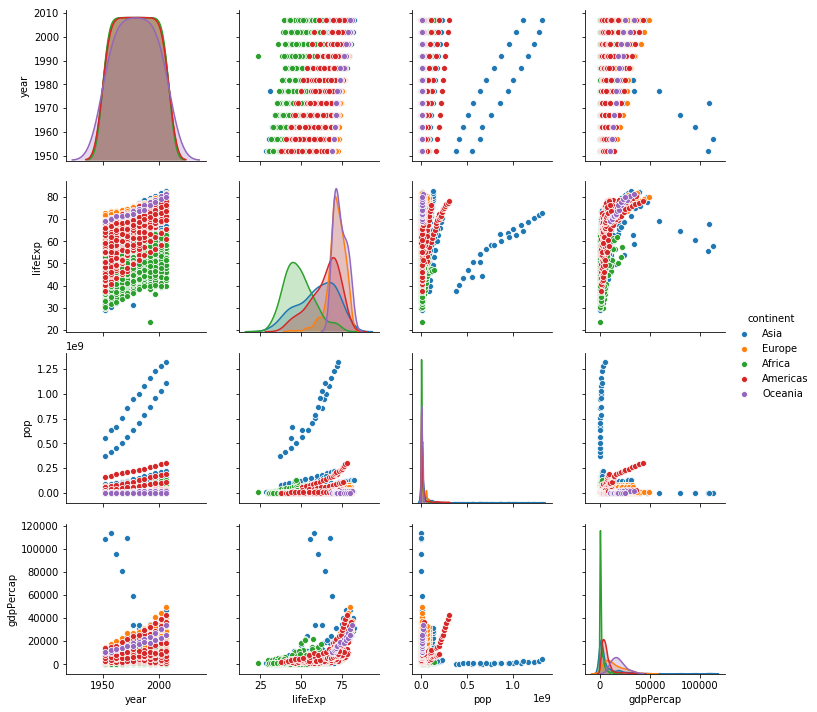

In [8]:
sns.pairplot(data, hue='continent')

3- Let us start with an understanding of the various variables, estimate the correlations between lifeExp and the other variables

In [9]:
data.corr()

,year,lifeExp,pop,gdpPercap
year,1.000000,0.435611,0.082308,0.227318
lifeExp,0.435611,1.000000,0.064955,0.583706
pop,0.082308,0.064955,1.000000,-0.025600
gdpPercap,0.227318,0.583706,-0.025600,1.000000


In [11]:
data.corr(method='spearman')

,year,lifeExp,pop,gdpPercap
year,1.000000,0.445865,0.219808,0.226905
lifeExp,0.445865,1.000000,0.180612,0.826471
pop,0.219808,0.180612,1.000000,0.052252
gdpPercap,0.226905,0.826471,0.052252,1.000000


4- Start with a simple linear regression model, model lifeExp as a function of year, pop and gdpPercap. How good is the model?

In [12]:
model = LinearRegression()

In [ ]:
# y = b1*x1 + b2*x2 + ....

In [13]:
data.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [29]:
data["pop2"]=data["pop"]/1000000

In [30]:
data.head()

,country,continent,year,lifeExp,pop,gdpPercap,pop2
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,8.425333
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,9.240934
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,10.267083
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,11.537966
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,13.079460


In [31]:
y = data['lifeExp']

In [32]:
X = data[['year', 'pop2', 'gdpPercap']]

In [33]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [34]:
model.score(X, y)

0.44017784393155734

In [35]:
model.coef_

array([0.23535289, 0.00635273, 0.00067293])

5- Add up the remaining other variables continent, is the model getting any better?

In [36]:
data.head()

,country,continent,year,lifeExp,pop,gdpPercap,pop2
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,8.425333
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,9.240934
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,10.267083
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,11.537966
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,13.079460


In [37]:
X2 = data[['continent', 'year', 'pop2', 'gdpPercap']]

In [38]:
model2 = LinearRegression()

In [39]:
model2.fit(X2,y)

ValueError: could not convert string to float: 'Asia'

In [40]:
data.head()

,country,continent,year,lifeExp,pop,gdpPercap,pop2
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,8.425333
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,9.240934
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,10.267083
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,11.537966
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,13.079460


In [41]:
X2.head()

,continent,year,pop2,gdpPercap
0,Asia,1952,8.425333,779.445314
1,Asia,1957,9.240934,820.853030
2,Asia,1962,10.267083,853.100710
3,Asia,1967,11.537966,836.197138
4,Asia,1972,13.079460,739.981106


In [43]:
X3 = pd.get_dummies(X2)

In [44]:
X3.head()

,year,pop2,gdpPercap,continent_Africa,continent_Americas,continent_Asia,continent_Europe,continent_Oceania
0,1952,8.425333,779.445314,0,0,1,0,0
1,1957,9.240934,820.853030,0,0,1,0,0
2,1962,10.267083,853.100710,0,0,1,0,0
3,1967,11.537966,836.197138,0,0,1,0,0
4,1972,13.079460,739.981106,0,0,1,0,0


In [46]:
model2.fit(X3, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [47]:
model2.score(X3, y)

0.7172062936555044

6- Can you interpret the model

In [48]:
model2.coef_

array([ 2.86258257e-01,  1.79064013e-03,  2.98489184e-04, -1.27175865e+01,
        1.57445698e+00, -3.34210048e+00,  6.64361064e+00,  7.84161939e+00])

In [50]:
model2.score?